# Exploratory Data Analysis Household Pulse Survey

### 1. Studying the dataset

Public Use Data File (PUF) includes a replicate weight data file, and a data dictionary for every new release of the survey. The shape of the datasets has changed over time, depending on the number of surveyed people and the addition of new variables. 

#### Features
- 20 weeks, from April 23rd to December 7th
- Surveyed people between 50k-100k per survey
- Variables between 82 to 188
- Demographic variables
- Index variables: SCRAM (ID) and WEEK
- Spending variables
- Food variables
- Shopping variables
- Telework
- Trips
- Health
- Work variables
- Missing data designed as -88 and -99
- Mostly categorical data
- Require use of data dictionary to interpretate the name of columns and categories

Some interesting variables related to the spending of the stimulus payment can be found during weeks 7 to 12 from Phase 1 of the Survey and changes in shopping patterns are part of the new questions incorporated in Phase 2, from week 13 onwards. Although spending and shopping variables are not asked simultaneously to the population, they offer valious insights for our study as the survey tries to be representative along demographic variables. and they are pre-processed separately.

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df1 = pd.read_csv('../data/interim/census/household_shopping1.csv')
df2 = pd.read_csv('../data/interim/census/household_shopping2.csv')
df3 = pd.read_csv('../data/interim/census/household_shopping3.csv')
df4 = pd.read_csv('../data/interim/census/household_shopping4.csv')
df5 = pd.read_csv('../data/interim/census/household_shopping5.csv')
df6 = pd.read_csv('../data/interim/census/household_shopping6.csv')
df7 = pd.read_csv('../data/interim/census/household_shopping7.csv')
df8 = pd.read_csv('../data/interim/census/household_shopping8.csv')

In [3]:
df1.replace({-99: np.nan, -88: np.nan}, inplace=True)
df2.replace({-99: np.nan, -88: np.nan}, inplace=True)
df3.replace({-99: np.nan, -88: np.nan}, inplace=True)
df4.replace({-99: np.nan, -88: np.nan}, inplace=True)
df5.replace({-99: np.nan, -88: np.nan}, inplace=True)
df6.replace({-99: np.nan, -88: np.nan}, inplace=True)
df7.replace({-99: np.nan, -88: np.nan}, inplace=True)
df8.replace({-99: np.nan, -88: np.nan}, inplace=True)

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
#df_scram drops the duplicates
df_scram = df.drop_duplicates()

In [5]:
print('Original size: {}'.format(df.shape))
print('Size dropping duplicates: {}'.format(df_scram.shape))

Original size: (705844, 44)
Size dropping duplicates: (705844, 44)


### PURPOSE EDA:
Overall expenditures and changes in consumer Behavior Relevant demographics: gender, states, cities, income, children at home, marital status.

### BASIC ANALYSIS: COMPOSITION OF THE SURVEY

### SPENDING VARIABLES
- Plotbar EIP: Use of Economic Impact Payment (Stimulus) and plot EIPSPND (Spending use of Economic Impact Payment). - Percent change of EIPSPND over time split by food and others (weekly and grouping by demographics).
- Plot Difficulty with expenses (EXPNS_DIF)

### SHOPPING VARIABLES
- Plot CHNGHOW1-CHNGHOW12: Spending and shopping change
- Plot Purchases modality
- Cash/credit card
- Resumed/avoided eating at restaurants
- Fewer trips to stores and trips transit.
- Why spending/shopping changed: Barplot reasons split by demographics

Defining useful functions:

In [6]:
def generation_(TBIRTH_YEAR):
# Function to determine generation by birthday year. 
# According to the survey, all persons born before 2002.
    if TBIRTH_YEAR in list(range(1946, 1955)):
        return 'Baby Boomer'
    elif TBIRTH_YEAR in list(range(1955, 1965)):
        return 'Generation Jones'
    elif TBIRTH_YEAR in list(range(1965, 1981)):
        return 'Generation X'
    elif TBIRTH_YEAR in list(range(1981, 1997)):
        return 'Millennials'
    elif TBIRTH_YEAR in list(range(1997, 2010)):
        return 'Generation Z'
    else:
        return 'Silent Generation'

In [7]:
def get_rctable(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    chi2, p, dof, ex = chi2_contingency(res)
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output.style.set_caption(f'{var1} vs. {var2}: Chi-square p-value={p:.5f}')

In [8]:
def get_rct(var1, var2, df):
    res = pd.crosstab(df[var2], df[var1])
    output = round( res.div(res.sum(axis = 1),axis = 0)*100, 2 )
    return output

In [9]:
def add_dates_start_end_inplace(data):
    data['DATE_START'] = data['WEEK'].apply(lambda idx: dates_from_weeks[idx][0])
    data['DATE_END']   = data['WEEK'].apply(lambda idx: dates_from_weeks[idx][1])
    return data

#### Legends by demographic variables

In [10]:
race = ['White', 
              'Black', 
              'Asian',
              'Other']

educ = ['Less than \nhigh school', 
               'Some high \nschool',
               'High school',
               'Some college',
               'Associate',
               'Bachelor',
               'Graduate']

marital = ['Married',
                  'Widowed',
                  'Divorced',
                  'Separated',
                  'Never married']

region = ['Northeast', 
          'South', 
          'Midwest', 
          'West']

diff_expnd = ['Not at all',
              'A little', 
              'Somewhat',
              'Very']

generation = ['Silent \nGeneration',
              'Baby \nBoomer',
              'Generation \nJones',
              'Generation X',
              'Generation Z',
              'Millennials']


msa = { '35620': 'New York-Newark-Jersey City',
        '31080': 'Los Angeles-Long Beach-Anaheim',
        '16980': 'Chicago-Naperville-Elgin',
        '19100': 'Dallas-Fort Worth-Arlington',
        '26420': 'Houston-The Woodlands-Sugar Land',
        '47900': 'Washington-Arlington-Alexandria',
        '33100': 'Miami-Fort Lauderdale-Pompano Beach',
        '37980': 'Philadelphia-Camden-Wilmington',
        '12060': 'Atlanta-Sandy Springs-Alpharetta',
        '38060': 'Phoenix-Mesa-Chandler',
        '14460': 'Boston-Cambridge-Newton',
        '41860': 'San Francisco-Oakland-Berkeley',
        '40140': 'Riverside-San Bernardino-Ontario',
        '19820': 'Detroit-Warren-Dearborn',
        '42660': 'Seattle-Tacoma-Bellevue'}

dates_from_weeks = {
     1: ('2020-04-23', '2020-05-05'),
     2: ('2020-05-07', '2020-05-12'),
     3: ('2020-05-14', '2020-05-19'),
     4: ('2020-05-21', '2020-05-26'),
     5: ('2020-05-28', '2020-06-02'),
     6: ('2020-06-04', '2020-06-09'),
     7: ('2020-06-11', '2020-06-16'),
     8: ('2020-06-18', '2020-06-23'),
     9: ('2020-06-25', '2020-06-30'),
    10: ('2020-07-02', '2020-07-07'),
    11: ('2020-07-09', '2020-07-14'),
    12: ('2020-07-16', '2020-07-21'),
    13: ('2020-08-19', '2020-08-31'),
    14: ('2020-09-02', '2020-09-14'),
    15: ('2020-09-16', '2020-09-28'),
    16: ('2020-09-30', '2020-10-12'),
    17: ('2020-10-14', '2020-10-26'),
    18: ('2020-10-28', '2020-11-09'),
    19: ('2020-11-11', '2020-11-23'),
    20: ('2020-11-25', '2020-12-07')    
}

## COMPOSITION OF THE SURVEY

In [11]:
df.columns

Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'REGION', 'TBIRTH_YEAR',
       'EGENDER', 'RHISPANIC', 'RRACE', 'EEDUC', 'MS', 'THHLD_NUMPER',
       'THHLD_NUMKID', 'THHLD_NUMADLT', 'EXPNS_DIF', 'CHNGHOW1', 'CHNGHOW2',
       'CHNGHOW3', 'CHNGHOW4', 'CHNGHOW5', 'CHNGHOW6', 'CHNGHOW7', 'CHNGHOW8',
       'CHNGHOW9', 'CHNGHOW10', 'CHNGHOW11', 'CHNGHOW12', 'WHYCHNGD1',
       'WHYCHNGD2', 'WHYCHNGD3', 'WHYCHNGD4', 'WHYCHNGD5', 'WHYCHNGD6',
       'WHYCHNGD7', 'WHYCHNGD8', 'WHYCHNGD9', 'WHYCHNGD10', 'WHYCHNGD11',
       'WHYCHNGD12', 'FEWRTRIPS', 'FEWRTRANS', 'PLNDTRIPS', 'CNCLDTRPS',
       'INCOME'],
      dtype='object')

In [12]:
df.groupby('REGION').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
REGION,,,,,,,,,,,,,,,,,,,,,
1.0,0.155133,0.155133,0.155133,0.069099,0.155133,0.155133,0.155133,0.155133,0.155133,0.153618,...,0.003083,0.026886,0.006405,0.046823,0.001979,0.141476,0.141826,0.141924,0.112329,0.119304
2.0,0.311339,0.311339,0.311339,0.110884,0.311339,0.311339,0.311339,0.311339,0.311339,0.308496,...,0.006611,0.048576,0.012669,0.093536,0.005139,0.284442,0.285203,0.285404,0.222791,0.239570
3.0,0.205397,0.205397,0.205397,0.033735,0.205397,0.205397,0.205397,0.205397,0.205397,0.203641,...,0.004454,0.029966,0.008063,0.058235,0.003157,0.188591,0.189029,0.189053,0.147149,0.160042
4.0,0.328131,0.328131,0.328131,0.101796,0.328131,0.328131,0.328131,0.328131,0.328131,0.325198,...,0.006666,0.057310,0.012472,0.105614,0.004403,0.304278,0.304876,0.305046,0.246267,0.261857


In [13]:
df.groupby('EGENDER').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,RHISPANIC,RRACE,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
EGENDER,,,,,,,,,,,,,,,,,,,,,
1.0,0.408525,0.408525,0.408525,0.133494,0.408525,0.408525,0.408525,0.408525,0.408525,0.404769,...,0.010090,0.067145,0.013793,0.119437,0.008791,0.375733,0.376687,0.376821,0.295078,0.320612
2.0,0.591475,0.591475,0.591475,0.182020,0.591475,0.591475,0.591475,0.591475,0.591475,0.586183,...,0.010723,0.095592,0.025814,0.184772,0.005887,0.543055,0.544248,0.544606,0.433458,0.460161


In [14]:
df.groupby('RRACE').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,EEDUC,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
RRACE,,,,,,,,,,,,,,,,,,,,,
1.0,0.821803,0.821803,0.821803,0.235855,0.821803,0.821803,0.821803,0.821803,0.821803,0.814572,...,0.016889,0.129745,0.030569,0.241779,0.012483,0.760603,0.762181,0.762446,0.609655,0.651390
2.0,0.078668,0.078668,0.078668,0.037275,0.078668,0.078668,0.078668,0.078668,0.078668,0.077768,...,0.001754,0.012535,0.004005,0.026502,0.000833,0.068730,0.069039,0.069194,0.051055,0.054462
3.0,0.049536,0.049536,0.049536,0.027295,0.049536,0.049536,0.049536,0.049536,0.049536,0.049005,...,0.001054,0.012346,0.002363,0.018610,0.000526,0.044300,0.044447,0.044484,0.033822,0.037229
4.0,0.049993,0.049993,0.049993,0.015090,0.049993,0.049993,0.049993,0.049993,0.049993,0.049607,...,0.001116,0.008111,0.002671,0.017318,0.000836,0.045154,0.045266,0.045303,0.034005,0.037691


In [15]:
race_reg = df.groupby(['REGION', 'RRACE']).count()
race_reg = (race_reg/race_reg.groupby(level=[0]).sum())*100
race_reg

SCRAM       WEEK     EST_ST    EST_MSA  TBIRTH_YEAR  \
REGION RRACE                                                            
1.0    1.0    84.976256  84.976256  84.976256  78.676727    84.976256   
       2.0     6.626484   6.626484   6.626484   9.821008     6.626484   
       3.0     4.945205   4.945205   4.945205   7.768642     4.945205   
       4.0     3.452055   3.452055   3.452055   3.733623     3.452055   
2.0    1.0    76.781627  76.781627  76.781627  70.210945    76.781627   
       2.0    15.005665  15.005665  15.005665  18.944127    15.005665   
       3.0     3.825589   3.825589   3.825589   6.623481     3.825589   
       4.0     4.387118   4.387118   4.387118   4.221447     4.387118   
3.0    1.0    88.358923  88.358923  88.358923  78.120275    88.358923   
       2.0     5.575329   5.575329   5.575329  12.527297     5.575329   
       3.0     2.634193   2.634193   2.634193   5.828994     2.634193   
       4.0     3.431555   3.431555   3.431555   3.523434     3.431555   
4.0    1.0    82.113389  82.113389  82.113389  75.919947    82.113389   
       2.0     3.113869   3.113869   3.113869   5.163391     3.113869   
       3.0     7.479848   7.479848   7.479848  12.393531     7.479848   
       4.0     7.292894   7.292894   7.292894   6.523131     7.292894   

                EGENDER  RHISPANIC      EEDUC         MS  THHLD_NUMPER  \
REGION RRACE                                                             
1.0    1.0    84.976256  84.976256  84.976256  85.004150     84.976256   
       2.0     6.626484   6.626484   6.626484   6.614406      6.626484   
       3.0     4.945205   4.945205   4.945205   4.930370      4.945205   
       4.0     3.452055   3.452055   3.452055   3.451074      3.452055   
2.0    1.0    76.781627  76.781627  76.781627  76.811022     76.781627   
       2.0    15.005665  15.005665  15.005665  14.978645     15.005665   
       3.0     3.825589   3.825589   3.825589   3.817681      3.825589   
       4.0     4.387118   4.387118   4.387118   4.392652      4.387118   
3.0    1.0    88.358923  88.358923  88.358923  88.381720     88.358923   
       2.0     5.575329   5.575329   5.575329   5.556599      5.575329   
       3.0     2.634193   2.634193   2.634193   2.625592      2.634193   
       4.0     3.431555   3.431555   3.431555   3.436089      3.431555   
4.0    1.0    82.113389  82.113389  82.113389  82.119378     82.113389   
       2.0     3.113869   3.113869   3.113869   3.100562      3.113869   
       3.0     7.479848   7.479848   7.479848   7.474547      7.479848   
       4.0     7.292894   7.292894   7.292894   7.305512      7.292894   

                ...      WHYCHNGD8  WHYCHNGD9  WHYCHNGD10  WHYCHNGD11  \
REGION RRACE    ...                                                     
1.0    1.0      ...      83.961397  82.626337   81.973015   82.535552   
       2.0      ...       8.272059   6.333983    8.117673    7.509834   
       3.0      ...       4.641544   7.677715    5.817297    5.894100   
       4.0      ...       3.125000   3.361964    4.092015    4.060514   
2.0    1.0      ...      75.803686  73.721819   70.610602   73.639090   
       2.0      ...      15.173596  15.416922   19.123239   16.851958   
       3.0      ...       4.157737   6.466008    4.596287    4.633304   
       4.0      ...       4.864981   4.395252    5.669873    4.875648   
3.0    1.0      ...      87.372774  86.898965   84.449130   86.451770   
       2.0      ...       5.916031   5.361449    7.239501    6.369055   
       3.0      ...       2.989822   4.425323    3.531892    3.342659   
       4.0      ...       3.721374   3.314264    4.779476    3.836516   
4.0    1.0      ...      80.977683  79.706813   76.689765   79.447865   
       2.0      ...       3.485654   3.030752    3.839600    3.326760   
       3.0      ...       7.545165  10.145357    9.008293    9.061398   
       4.0      ...       7.991498   7.117077   10.462342    8.163977   

              WHYCHNGD12  FEWRTRIPS  FEWRTRANS  PLNDTRI

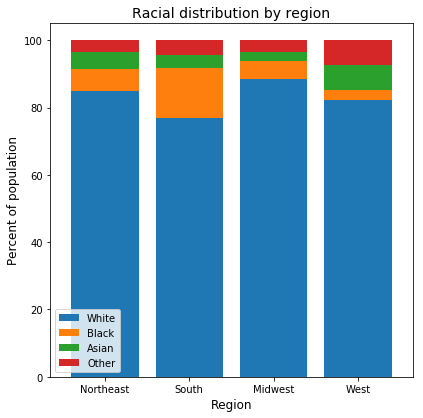

In [16]:
race_reg = df.groupby(['REGION', 'RRACE']).count()
race_reg = (race_reg/race_reg.groupby(level=[0]).sum())*100

test = race_reg.SCRAM.unstack('RRACE').fillna(0)
legend = race

labels = region

fig, ax = plt.subplots(figsize=(6.5, 6.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Racial distribution by region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percent of population', size=12)

In [17]:
df.groupby('EEDUC').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,MS,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
EEDUC,,,,,,,,,,,,,,,,,,,,,
1.0,0.006021,0.006021,0.006021,0.001938,0.006021,0.006021,0.006021,0.006021,0.006021,0.005928,...,0.000115,0.000156,0.000245,0.001514,0.000140,0.004942,0.004988,0.004995,0.002345,0.003790
2.0,0.013737,0.013737,0.013737,0.004409,0.013737,0.013737,0.013737,0.013737,0.013737,0.013582,...,0.000235,0.000422,0.000476,0.003706,0.000164,0.011409,0.011500,0.011524,0.005592,0.008778
3.0,0.115861,0.115861,0.115861,0.029089,0.115861,0.115861,0.115861,0.115861,0.115861,0.114668,...,0.002156,0.005853,0.004487,0.031974,0.001544,0.102782,0.103173,0.103241,0.062294,0.082488
4.0,0.216871,0.216871,0.216871,0.060329,0.216871,0.216871,0.216871,0.216871,0.216871,0.214936,...,0.004424,0.022971,0.008935,0.069297,0.003210,0.196480,0.196908,0.196978,0.145606,0.162780
5.0,0.105628,0.105628,0.105628,0.026815,0.105628,0.105628,0.105628,0.105628,0.105628,0.104687,...,0.002427,0.011272,0.004470,0.034080,0.001560,0.096851,0.097080,0.097116,0.073963,0.081565
6.0,0.292531,0.292531,0.292531,0.099545,0.292531,0.292531,0.292531,0.292531,0.292531,0.290057,...,0.006504,0.060308,0.011226,0.089221,0.004483,0.271669,0.272181,0.272332,0.230593,0.235260
7.0,0.249351,0.249351,0.249351,0.093390,0.249351,0.249351,0.249351,0.249351,0.249351,0.247094,...,0.004952,0.061756,0.009768,0.074416,0.003576,0.234655,0.235106,0.235240,0.208144,0.206112


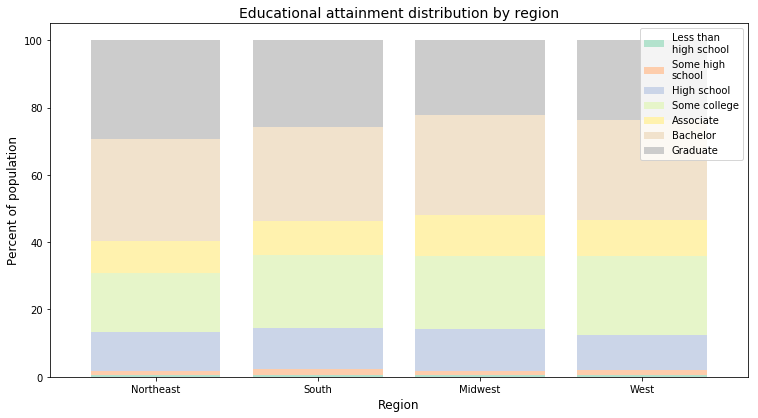

In [18]:
educ_reg = df.groupby(['REGION', 'EEDUC']).count()
educ_reg = (educ_reg/educ_reg.groupby(level=[0]).sum())*100

test = educ_reg.SCRAM.unstack('EEDUC').fillna(0)
legend = educ

labels = region

fig, ax = plt.subplots(figsize=(12.5, 6.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap=plt.cm.get_cmap('Pastel2', 7))
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Educational attainment distribution by region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percent of population', size=12)

In [19]:
df.groupby('MS').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
MS,,,,,,,,,,,,,,,,,,,,,
1.0,0.574800,0.574800,0.574800,0.175706,0.574800,0.574800,0.574800,0.574800,0.574800,0.574800,...,0.012581,0.100699,0.021746,0.170414,0.009468,0.534284,0.535392,0.535671,0.444090,0.455883
2.0,0.048675,0.048675,0.048675,0.014281,0.048675,0.048675,0.048675,0.048675,0.048675,0.048675,...,0.000708,0.002907,0.001078,0.015369,0.000696,0.045443,0.045640,0.045667,0.031073,0.038371
3.0,0.150294,0.150294,0.150294,0.043799,0.150294,0.150294,0.150294,0.150294,0.150294,0.150294,...,0.002926,0.019268,0.005667,0.051904,0.001914,0.139675,0.140064,0.140123,0.103529,0.120248
4.0,0.018233,0.018233,0.018233,0.006200,0.018233,0.018233,0.018233,0.018233,0.018233,0.018233,...,0.000351,0.002217,0.000793,0.006137,0.000197,0.016338,0.016393,0.016402,0.011297,0.013647
5.0,0.198950,0.198950,0.198950,0.072556,0.198950,0.198950,0.198950,0.198950,0.198950,0.198950,...,0.004179,0.037055,0.010148,0.058806,0.002326,0.178531,0.178888,0.178998,0.135142,0.149396


In [20]:
df.groupby('THHLD_NUMPER').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
THHLD_NUMPER,,,,,,,,,,,,,,,,,,,,,
1.0,0.168152,0.168152,0.168152,0.054508,0.168152,0.168152,0.168152,0.168152,0.168152,0.168152,...,0.003142,0.021176,0.005233,0.051096,0.002093,0.155944,0.156401,0.156509,0.113579,0.137015
2.0,0.375414,0.375414,0.375414,0.111183,0.375414,0.375414,0.375414,0.375414,0.375414,0.375414,...,0.007441,0.055079,0.012803,0.113203,0.005945,0.349002,0.349742,0.349941,0.282839,0.300565
3.0,0.174482,0.174482,0.174482,0.057244,0.174482,0.174482,0.174482,0.174482,0.174482,0.174482,...,0.003769,0.032958,0.007930,0.054632,0.002362,0.159029,0.159394,0.159430,0.127191,0.134210
4.0,0.157946,0.157946,0.157946,0.053483,0.157946,0.157946,0.157946,0.157946,0.157946,0.157946,...,0.003603,0.033537,0.007631,0.047577,0.002244,0.143610,0.143907,0.143969,0.118236,0.119226
5.0,0.073122,0.073122,0.073122,0.023375,0.073122,0.073122,0.073122,0.073122,0.073122,0.073122,...,0.001615,0.012765,0.003484,0.022166,0.001078,0.065741,0.065891,0.065937,0.052252,0.053515
6.0,0.029790,0.029790,0.029790,0.009206,0.029790,0.029790,0.029790,0.029790,0.029790,0.029790,...,0.000670,0.004528,0.001429,0.009015,0.000460,0.026745,0.026818,0.026843,0.020726,0.021527
7.0,0.011245,0.011245,0.011245,0.003502,0.011245,0.011245,0.011245,0.011245,0.011245,0.011245,...,0.000265,0.001524,0.000547,0.003553,0.000196,0.010043,0.010065,0.010076,0.007605,0.008036
8.0,0.004791,0.004791,0.004791,0.001444,0.004791,0.004791,0.004791,0.004791,0.004791,0.004791,...,0.000105,0.000625,0.000237,0.001557,0.000086,0.004313,0.004334,0.004335,0.003168,0.003413
9.0,0.001866,0.001866,0.001866,0.000579,0.001866,0.001866,0.001866,0.001866,0.001866,0.001866,...,0.000034,0.000208,0.000085,0.000584,0.000035,0.001658,0.001663,0.001663,0.001206,0.001278


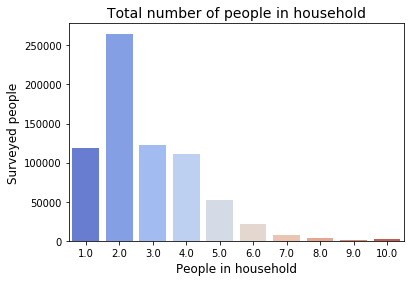

In [21]:
_ = sns.countplot(df.THHLD_NUMPER, palette='coolwarm')
_ = plt.title('Total number of people in household', size=14)
_ = plt.xlabel('People in household', size=12)
_ = plt.ylabel('Surveyed people', size=12)

In [22]:
df.groupby('THHLD_NUMKID').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
THHLD_NUMKID,,,,,,,,,,,,,,,,,,,,,
0.0,0.638603,0.638603,0.638603,0.202383,0.638603,0.638603,0.638603,0.638603,0.638603,0.638603,...,0.012865,0.093974,0.022760,0.195438,0.009576,0.591197,0.592598,0.592920,0.465169,0.510881
1.0,0.157842,0.157842,0.157842,0.051018,0.157842,0.157842,0.157842,0.157842,0.157842,0.157842,...,0.003436,0.029274,0.007223,0.049033,0.002118,0.143251,0.143586,0.143665,0.113602,0.118135
2.0,0.129336,0.129336,0.129336,0.042138,0.129336,0.129336,0.129336,0.129336,0.129336,0.129336,...,0.002807,0.027655,0.006088,0.038432,0.001704,0.117685,0.117940,0.117984,0.097228,0.097660
3.0,0.049389,0.049389,0.049389,0.013963,0.049389,0.049389,0.049389,0.049389,0.049389,0.049389,...,0.001026,0.008492,0.002332,0.014400,0.000714,0.044422,0.044503,0.044545,0.035508,0.036218
4.0,0.016304,0.016304,0.016304,0.004021,0.016304,0.016304,0.016304,0.016304,0.016304,0.016304,...,0.000377,0.002338,0.000734,0.004577,0.000278,0.014673,0.014723,0.014723,0.011470,0.011936
5.0,0.008526,0.008526,0.008526,0.001991,0.008526,0.008526,0.008526,0.008526,0.008526,0.008526,...,0.000303,0.001004,0.000472,0.002328,0.000288,0.007560,0.007585,0.007591,0.005559,0.005943


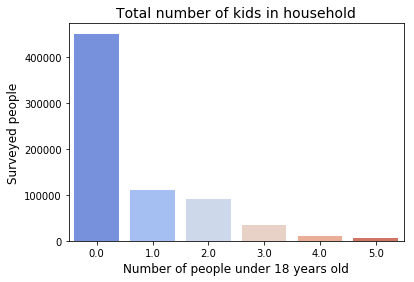

In [23]:
_ = sns.countplot(df.THHLD_NUMKID, palette='coolwarm')
_ = plt.title('Total number of kids in household', size=14)
_ = plt.xlabel('Number of people under 18 years old', size=12)
_ = plt.ylabel('Surveyed people', size=12)

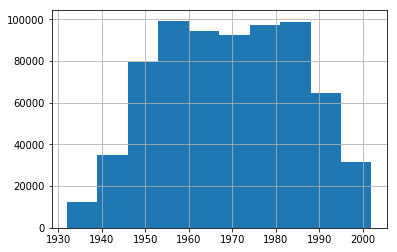

In [24]:
df.TBIRTH_YEAR.hist()

In [25]:
df['GENERATION'] = df.TBIRTH_YEAR.apply(lambda x: generation_(x))

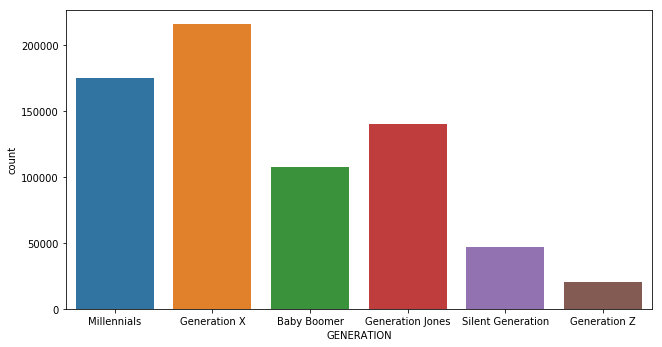

In [26]:
fig, ax = plt.subplots(figsize=(10.5, 5.5))
_ = sns.countplot(df.GENERATION)

In [27]:
df.groupby('GENERATION').count()/len(df)

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD8,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME
GENERATION,,,,,,,,,,,,,,,,,,,,,
Baby Boomer,0.152671,0.152671,0.152671,0.044343,0.152671,0.152671,0.152671,0.152671,0.152671,0.152671,...,0.002518,0.010498,0.003054,0.047278,0.002645,0.144182,0.144573,0.144669,0.112101,0.124190
Generation Jones,0.198306,0.198306,0.198306,0.061101,0.198306,0.198306,0.198306,0.198306,0.198306,0.198306,...,0.004328,0.027876,0.007395,0.065696,0.003149,0.184919,0.185413,0.185515,0.145694,0.159521
Generation X,0.305654,0.305654,0.305654,0.101612,0.305654,0.305654,0.305654,0.305654,0.305654,0.305654,...,0.006816,0.060957,0.013339,0.096119,0.004127,0.280991,0.281555,0.281697,0.230486,0.240334
Generation Z,0.028696,0.028696,0.028696,0.008339,0.028696,0.028696,0.028696,0.028696,0.028696,0.028696,...,0.000659,0.004025,0.001806,0.005819,0.000421,0.022655,0.022703,0.022722,0.015928,0.015683
Millennials,0.247835,0.247835,0.247835,0.079302,0.247835,0.247835,0.247835,0.247835,0.247835,0.247835,...,0.005575,0.056753,0.013225,0.070629,0.003018,0.223385,0.223729,0.223828,0.182410,0.189066
Silent Generation,0.066838,0.066838,0.066838,0.020818,0.066838,0.066838,0.066838,0.066838,0.066838,0.066838,...,0.000918,0.002628,0.000788,0.018668,0.001318,0.062655,0.062960,0.062996,0.041917,0.051979


### In summary:

- Region: 32.8% of the surveyed people belong to the West Region, followed by 31.1% who live in the South; 20.5% in the Midwest, and 15.5% in the Northeast.
- Gender: 59% of the surveyed people are identified as women (binary options only).
- Race: 82% identify themselves as white; 7.8% as black; 5% as Asian and 5% other race or race in combination.
- Educational attainment: 29.2% of the surveyed people have a Bachelor’s degree across the country, followed by 24.8% who have completed a Graduate’s degree and 21.6% an incomplete college degree. Only 2% have less than a high school or an incomplete high school.
- Generation: 30% of the surveyed people belong to Generation X, 25% to Millennials, 20% to Generation Jones, 15% to Baby Boomers, 6.7% to Silent Generation and 3% to Generation Z. It means that the majority of the sample was born between 1946 and 1996.

## Difficulty with expenditures

In [28]:
df.EXPNS_DIF.unique()

array([  1.,   3.,   4.,   2.,  nan])

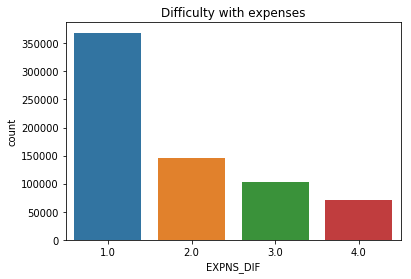

In [29]:
_ = sns.countplot(data=df, x='EXPNS_DIF')
_ = plt.title('Difficulty with expenses')

In [30]:
pd.crosstab(df.WEEK, df.EXPNS_DIF).apply(lambda r: r/r.sum(), axis=1)

EXPNS_DIF,1.0,2.0,3.0,4.0
WEEK,,,,
13.0,0.534653,0.216813,0.149628,0.098907
14.0,0.536206,0.214764,0.149054,0.099976
15.0,0.538613,0.213319,0.149344,0.098723
16.0,0.544011,0.211942,0.145644,0.098403
17.0,0.540166,0.209747,0.148257,0.101830
18.0,0.538696,0.207199,0.146440,0.107666
19.0,0.523185,0.214171,0.150795,0.111849
20.0,0.528396,0.204257,0.151130,0.116217


In [31]:
pd.crosstab(df.REGION, df.EXPNS_DIF).apply(lambda r: r/r.sum(), axis=1)

EXPNS_DIF,1.0,2.0,3.0,4.0
REGION,,,,
1.0,0.542140,0.216796,0.145795,0.095269
2.0,0.520171,0.209381,0.153713,0.116735
3.0,0.551379,0.212372,0.142048,0.094201
4.0,0.538291,0.212270,0.149768,0.099672


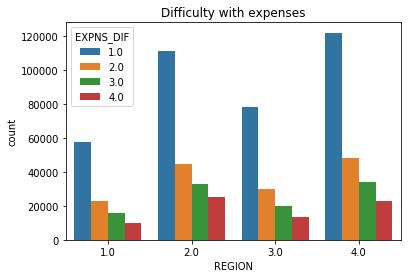

In [32]:
_ = sns.countplot(data=df, x='REGION', hue='EXPNS_DIF')
_ = plt.title('Difficulty with expenses')

In [33]:
expns_reg = df.groupby(['REGION', 'EXPNS_DIF']).count()
expns_reg = expns_reg/expns_reg.groupby(level=[0]).sum()*100

In [34]:
expns_reg.iloc[:, 1]

REGION  EXPNS_DIF
1.0     1.0          54.214016
        2.0          21.679596
        3.0          14.579538
        4.0           9.526851
2.0     1.0          52.017085
        2.0          20.938110
        3.0          15.371300
        4.0          11.673505
3.0     1.0          55.137859
        2.0          21.237191
        3.0          14.204835
        4.0           9.420115
4.0     1.0          53.829055
        2.0          21.226959
        3.0          14.976821
        4.0           9.967165
Name: WEEK, dtype: float64

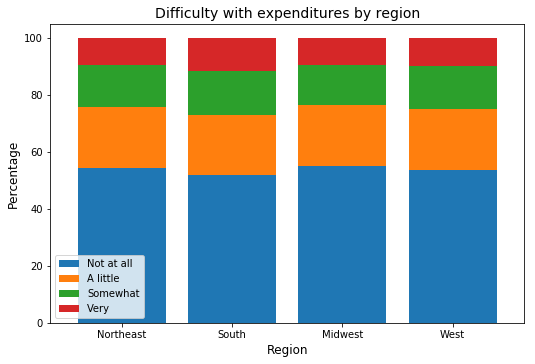

In [35]:
test = expns_reg.SCRAM.unstack('EXPNS_DIF').fillna(0)
legend = diff_expnd
labels = region

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(4), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Difficulty with expenditures by region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percentage', size=12)

In [36]:
expns_reg_race = df.groupby(['REGION', 'RRACE', 'EXPNS_DIF']).count()
expns_reg_race = expns_reg_race/expns_reg_race.groupby(level=[0]).sum()*100

In [37]:
expns_race_reg = expns_reg_race/expns_reg_race.groupby(level=[1]).sum()*100

In [38]:
expns_race_reg.iloc[:, 1].head()

REGION  RRACE  EXPNS_DIF
1.0     1.0    1.0          14.527495
               2.0           5.455919
               3.0           3.493537
               4.0           2.100014
        2.0    1.0           6.669157
Name: WEEK, dtype: float64

In [39]:
expns_reg_race.iloc[:, 1].head()

REGION  RRACE  EXPNS_DIF
1.0     1.0    1.0          48.376190
               2.0          18.168072
               3.0          11.633389
               4.0           6.992994
        2.0    1.0           1.993839
Name: WEEK, dtype: float64

In [40]:
expns_race_reg.head()

SCRAM       WEEK     EST_ST    EST_MSA  \
REGION RRACE EXPNS_DIF                                               
1.0    1.0   1.0        14.527495  14.527495  14.527495  15.082689   
             2.0         5.455919   5.455919   5.455919   5.450578   
             3.0         3.493537   3.493537   3.493537   3.383429   
             4.0         2.100014   2.100014   2.100014   2.047006   
       2.0   1.0         6.669157   6.669157   6.669157   6.501256   

                        TBIRTH_YEAR    EGENDER  RHISPANIC      EEDUC  \
REGION RRACE EXPNS_DIF                                                 
1.0    1.0   1.0          14.527495  14.527495  14.527495  14.527495   
             2.0           5.455919   5.455919   5.455919   5.455919   
             3.0           3.493537   3.493537   3.493537   3.493537   
             4.0           2.100014   2.100014   2.100014   2.100014   
       2.0   1.0           6.669157   6.669157   6.669157   6.669157   

                               MS  THHLD_NUMPER     ...      WHYCHNGD9  \
REGION RRACE EXPNS_DIF                              ...                  
1.0    1.0   1.0        14.534825     14.527495     ...      15.092593   
             2.0         5.453500      5.455919     ...       6.130141   
             3.0         3.490353      3.493537     ...       3.103455   
             4.0         2.100901      2.100014     ...       1.262616   
       2.0   1.0         6.671058      6.669157     ...       8.142636   

                        WHYCHNGD10  WHYCHNGD11  WHYCHNGD12  FEWRTRIPS  \
REGION RRACE EXPNS_DIF                                                  
1.0    1.0   1.0         12.241483    9.894444   18.499019  14.642176   
             2.0          7.354762    7.239309    3.716507   5.373674   
             3.0          4.421319    5.212453    2.108805   3.451143   
             4.0          2.115464    3.281532    1.231876   2.093110   
       2.0   1.0          6.060414    4.814200   12.735772   6.813636   

                        FEWRTRANS  PLNDTRIPS  CNCLDTRPS     INCOME  GENERATION  
REGION RRACE EXPNS_DIF                                                          
1.0    1.0   1.0        14.644873  14.644756  15.184288  14.793141   14.527495  
             2.0         5.373187   5.370103   5.289321   5.246517    5.455919  
             3.0         3.452204   3.454302   3.260714   3.393188    3.493537  
             4.0         2.092979   2.092791   1.828735   2.100158    2.100014  
       2.0   1.0         6.801355   6.806901   7.031399   7.093456    6.669157  

[5 rows x 42 columns]

In [41]:
expns_reg_race.reset_index().head()

,REGION,RRACE,EXPNS_DIF,SCRAM,WEEK,EST_ST,EST_MSA,TBIRTH_YEAR,EGENDER,RHISPANIC,...,WHYCHNGD9,WHYCHNGD10,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME,GENERATION
0,1.0,1.0,1.0,48.376190,48.376190,48.376190,45.823661,48.376190,48.376190,48.376190,...,48.747032,38.407080,31.869131,63.512545,48.996830,48.994766,48.985959,51.337628,49.875172,48.376190
1,1.0,1.0,2.0,18.168072,18.168072,18.168072,16.559743,18.168072,18.168072,18.168072,...,19.799525,23.075221,23.317177,12.759857,17.981823,17.976123,17.962719,17.883037,17.688668,18.168072
2,1.0,1.0,3.0,11.633389,11.633389,11.633389,10.279407,11.633389,11.633389,11.633389,...,10.023740,13.871681,16.788852,7.240143,11.548493,11.549431,11.554462,11.024378,11.440154,11.633389
3,1.0,1.0,4.0,6.992994,6.992994,6.992994,6.219136,6.992994,6.992994,6.992994,...,4.078080,6.637168,10.569524,4.229391,7.004133,7.002112,7.000280,6.182898,7.080698,6.992994
4,1.0,2.0,1.0,1.993839,1.993839,1.993839,2.990335,1.993839,1.993839,1.993839,...,2.453179,2.323009,1.638897,2.724014,1.968220,1.968437,1.973079,1.909814,1.918779,1.993839


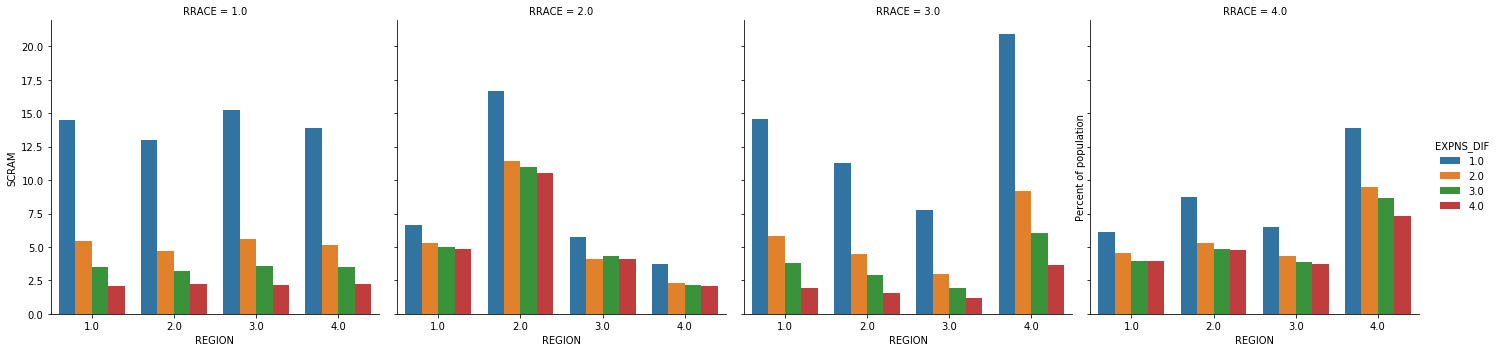

In [42]:
_ = sns.catplot(data=expns_race_reg.reset_index(), x='REGION', hue='EXPNS_DIF', y='SCRAM', col='RRACE', kind='bar')
_ = plt.ylabel('Percent of population')

In [43]:
expns_generation = df.groupby(['GENERATION', 'EXPNS_DIF']).count()
expns_generation = expns_generation/expns_generation.groupby(level=[0]).sum()*100

In [44]:
expns_generation.head()

SCRAM       WEEK     EST_ST    EST_MSA  \
GENERATION       EXPNS_DIF                                               
Baby Boomer      1.0        65.553979  65.553979  65.553979  64.250277   
                 2.0        18.751064  18.751064  18.751064  18.823030   
                 3.0        11.322736  11.322736  11.322736  11.988380   
                 4.0         4.372221   4.372221   4.372221   4.938312   
Generation Jones 1.0        55.526530  55.526530  55.526530  54.832643   

                               REGION  TBIRTH_YEAR    EGENDER  RHISPANIC  \
GENERATION       EXPNS_DIF                                                 
Baby Boomer      1.0        65.553979    65.553979  65.553979  65.553979   
                 2.0        18.751064    18.751064  18.751064  18.751064   
                 3.0        11.322736    11.322736  11.322736  11.322736   
                 4.0         4.372221     4.372221   4.372221   4.372221   
Generation Jones 1.0        55.526530    55.526530  55.526530  55.526530   

                                RRACE      EEDUC    ...      WHYCHNGD8  \
GENERATION       EXPNS_DIF                          ...                  
Baby Boomer      1.0        65.553979  65.553979    ...      72.169014   
                 2.0        18.751064  18.751064    ...      18.535211   
                 3.0        11.322736  11.322736    ...       7.154930   
                 4.0         4.372221   4.372221    ...       2.140845   
Generation Jones 1.0        55.526530  55.526530    ...      70.767717   

                            WHYCHNGD9  WHYCHNGD10  WHYCHNGD11  WHYCHNGD12  \
GENERATION       EXPNS_DIF                                                  
Baby Boomer      1.0        61.819900   54.153132   46.327921   75.080559   
                 2.0        22.910760   26.635731   27.608872   13.587540   
                 3.0        11.772647   14.431555   18.562982    8.378088   
                 4.0         3.496692    4.779582    7.500225    2.953813   
Generation Jones 1.0        60.095640   49.242279   37.485964   70.045045   

                            FEWRTRIPS  FEWRTRANS  PLNDTRIPS  CNCLDTRPS  \
GENERATION       EXPNS_DIF                                               
Baby Boomer      1.0        65.953112  65.926246  65.916560  67.933888   
                 2.0        18.569151  18.582829  18.572508  18.003493   
                 3.0        11.184599  11.196616  11.208444  10.350806   
                 4.0         4.293138   4.294310   4.302489   3.711812   
Generation Jones 1.0        55.929706  55.893181  55.892230  58.104318   

                               INCOME  
GENERATION       EXPNS_DIF             
Baby Boomer      1.0        66.512881  
                 2.0        18.281792  
                 3.0        10.920656  
                 4.0         4.284670  
Generation Jones 1.0        56.527384  

[5 rows x 43 columns]

## CHANGES IN SHOPPING BEHAVIORS


### 1. PURCHASES

In [45]:
df = add_dates_start_end_inplace(df)

In [46]:
df.head()

,SCRAM,WEEK,EST_ST,EST_MSA,REGION,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,...,WHYCHNGD11,WHYCHNGD12,FEWRTRIPS,FEWRTRANS,PLNDTRIPS,CNCLDTRPS,INCOME,GENERATION,DATE_START,DATE_END
0,V130000001S12010403200123,13.0,48.0,19100.0,2.0,1989.0,1.0,1.0,1.0,6.0,...,NaN,NaN,2.0,2.0,2.0,NaN,2.0,Millennials,2020-08-19,2020-08-31
1,V130000001S34010154300113,13.0,1.0,NaN,2.0,1988.0,2.0,1.0,1.0,5.0,...,1.0,NaN,2.0,3.0,1.0,2.0,6.0,Millennials,2020-08-19,2020-08-31
2,V130000001S37010241600123,13.0,1.0,NaN,2.0,1969.0,1.0,2.0,2.0,4.0,...,NaN,NaN,1.0,1.0,1.0,1.0,7.0,Generation X,2020-08-19,2020-08-31
3,V130000001S37010645600123,13.0,1.0,NaN,2.0,1947.0,1.0,1.0,1.0,7.0,...,NaN,NaN,1.0,1.0,1.0,1.0,6.0,Baby Boomer,2020-08-19,2020-08-31
4,V130000001S70011963510113,13.0,1.0,NaN,2.0,1968.0,2.0,1.0,2.0,6.0,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,Generation X,2020-08-19,2020-08-31


In [47]:
x = df.loc[:, ['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3']].idxmax(axis=1)
df['PURCHASE'] = x

In [48]:
demographics = df.columns[0:14]

In [49]:
df_purchase = df.loc[:, list(demographics) + ['PURCHASE','GENERATION','DATE_START']]
df_purchase_valid = df_purchase.dropna(subset=['PURCHASE'])
df_purchase_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431117 entries, 1 to 72482
Data columns (total 17 columns):
SCRAM            431117 non-null object
WEEK             431117 non-null float64
EST_ST           431117 non-null float64
EST_MSA          143086 non-null float64
REGION           431117 non-null float64
TBIRTH_YEAR      431117 non-null float64
EGENDER          431117 non-null float64
RHISPANIC        431117 non-null float64
RRACE            431117 non-null float64
EEDUC            431117 non-null float64
MS               429175 non-null float64
THHLD_NUMPER     431117 non-null float64
THHLD_NUMKID     431117 non-null float64
THHLD_NUMADLT    431117 non-null float64
PURCHASE         431117 non-null object
GENERATION       431117 non-null object
DATE_START       431117 non-null object
dtypes: float64(13), object(4)
memory usage: 59.2+ MB


In [50]:
get_rctable('PURCHASE', 'DATE_START', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
DATE_START,,,
2020-08-19,84.44,7.18,8.38
2020-09-02,84.27,6.98,8.74
2020-09-16,84.2,6.97,8.83
2020-09-30,84.59,6.8,8.61
2020-10-14,85.37,6.6,8.03
2020-10-28,85.96,6.67,7.37
2020-11-11,87.29,6.24,6.47
2020-11-25,89.52,5.59,4.88


#### Cumulative percentage of change in purchase modality across the weeks 13th and 20th of the Household Survey

The contingency table below shows the percentage of surveyed people who declare do more purchases using one of the specified modalities during the pandemic: made more purchases online, as opposed to in store, more purchases by curbside pick-up and more purchases in-store. All of them mutually excluyent since the surveyed person can select only one of them. 

In the graph below, we see the cumulative percentage of change over time to explore the trends over the three modalities. In a nationwide, online purchases are highly prefered and they increase across the weeks as alternative to in-store and curbside purchases, which were decreasing over time. 

In [51]:
temp = get_rct('PURCHASE', 'DATE_START', df_purchase_valid).pct_change().cumsum().reset_index()
temp 

PURCHASE,DATE_START,CHNGHOW1,CHNGHOW2,CHNGHOW3
0,2020-08-19,NaN,NaN,NaN
1,2020-09-02,-0.002013,-0.027855,0.042959
2,2020-09-16,-0.002844,-0.029288,0.053257
3,2020-09-30,0.001788,-0.053678,0.028342
4,2020-10-14,0.011009,-0.083090,-0.039022
5,2020-10-28,0.017920,-0.072484,-0.121213
6,2020-11-11,0.033392,-0.136952,-0.243330
7,2020-11-25,0.058939,-0.241118,-0.489080


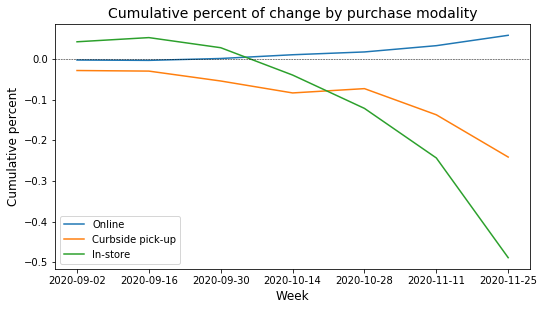

In [52]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y='CHNGHOW1', x='DATE_START', data=temp, label='Online')
_ = sns.lineplot(y='CHNGHOW2', x='DATE_START', data=temp, label='Curbside pick-up')
_ = sns.lineplot(y='CHNGHOW3', x='DATE_START', data=temp, label='In-store')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change by purchase modality', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [53]:
temp1 = pd.crosstab(df_purchase_valid.DATE_START, [df_purchase_valid.PURCHASE, df_purchase_valid.REGION])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

In [54]:
temp2

PURCHASE  DATE_START  CHNGHOW1                                CHNGHOW2  \
REGION                     1.0       2.0       3.0       4.0       1.0   
0         2020-08-19       NaN       NaN       NaN       NaN       NaN   
1         2020-09-02 -0.024602 -0.014569  0.004963  0.017677 -0.058824   
2         2020-09-16 -0.014216 -0.022529  0.019160  0.009524 -0.071324   
3         2020-09-30  0.023229 -0.040871  0.035594  0.012740 -0.147273   
4         2020-10-14  0.009074 -0.046710  0.067330  0.034115 -0.202067   
5         2020-10-28  0.007639 -0.053366  0.078938  0.054694 -0.144096   
6         2020-11-11  0.023455 -0.067162  0.129426  0.074175 -0.335877   
7         2020-11-25  0.044686 -0.026794  0.155095  0.089260 -0.285030   

PURCHASE                                CHNGHOW3                                
REGION         2.0       3.0       4.0       1.0       2.0       3.0       4.0  
0              NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1        -0.075472  0.060403 -0.018182  0.096296  0.039427 -0.016760  0.056911  
2        -0.050982  0.028757 -0.027441  0.008458  0.080806 -0.050851  0.118449  
3        -0.110743  0.094117 -0.060151 -0.021171  0.057627 -0.092027  0.107579  
4        -0.157353  0.038902 -0.035997 -0.044072 -0.016949 -0.147242  0.016004  
5        -0.188464  0.058382  0.001739 -0.184697 -0.148817 -0.114774 -0.052544  
6        -0.280207  0.071121 -0.052806 -0.366515 -0.254303 -0.297164 -0.126137  
7        -0.391318 -0.042086 -0.182614 -0.633182 -0.527888 -0.504857 -0.355109

In [55]:
temp2.columns[3]

('CHNGHOW1', 3.0)

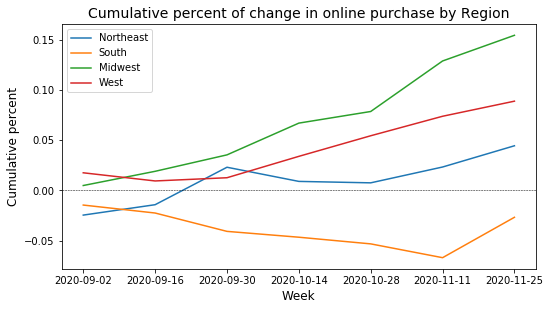

In [56]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[1], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[2], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[3], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[4], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change in online purchase by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

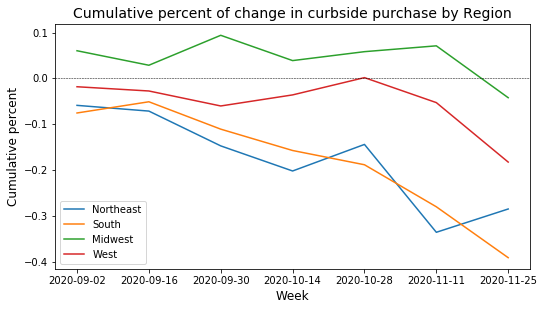

In [57]:
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[5], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[6], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change in curbside purchase by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

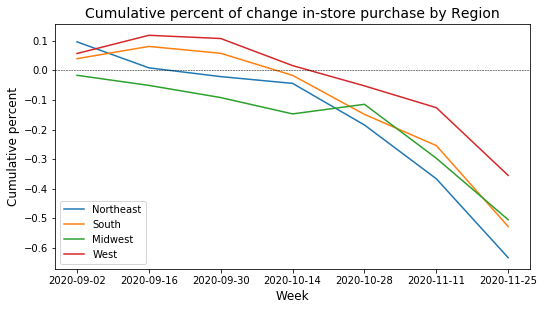

In [58]:
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[9], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[10], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[11], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[12], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change in-store purchase by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [59]:
get_rctable('PURCHASE', 'REGION', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
REGION,,,
1.0,87.71,4.64,7.64
2.0,84.09,7.47,8.45
3.0,84.55,7.66,7.79
4.0,86.35,6.34,7.32


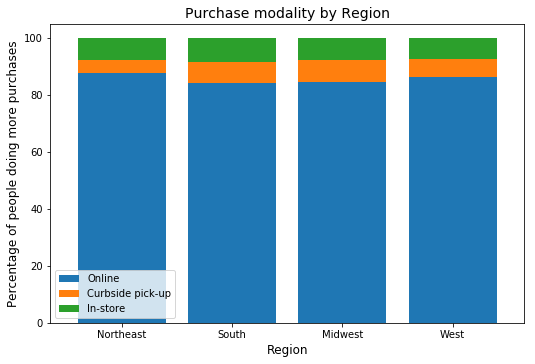

In [60]:
purchase_reg = df_purchase_valid.groupby(['REGION', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg .SCRAM.unstack('PURCHASE').fillna(0)
legend = ['Online', 'Curbside pick-up', 'In-store']
labels = region

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Purchase modality by Region', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percentage of people doing more purchases', size=12)
#_ = plt.yscale('log')
#_ = plt.ylim(0, 100)

In [61]:
get_rctable('PURCHASE', 'RRACE', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
RRACE,,,
1.0,86.29,6.56,7.15
2.0,78.61,8.35,13.05
3.0,86.99,5.06,7.95
4.0,81.57,7.91,10.53


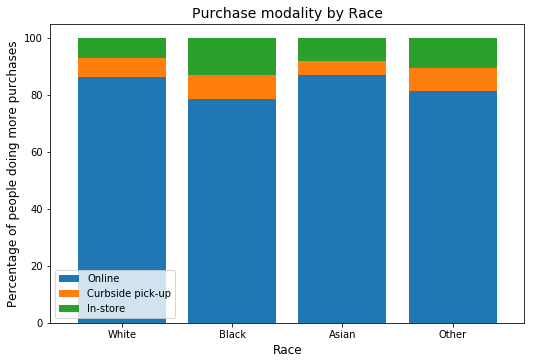

In [62]:
purchase_reg = df_purchase_valid.groupby(['RRACE', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg .SCRAM.unstack('PURCHASE').fillna(0)
legend = ['Online', 'Curbside pick-up', 'In-store']
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Purchase modality by Race', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percentage of people doing more purchases', size=12)

In [63]:
get_rctable('PURCHASE', 'EEDUC', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
EEDUC,,,
1.0,61.49,12.33,26.18
2.0,66.25,11.96,21.79
3.0,75.01,9.59,15.4
4.0,82.37,8.08,9.55
5.0,83.52,7.45,9.03
6.0,88.02,5.95,6.03
7.0,90.29,4.94,4.77


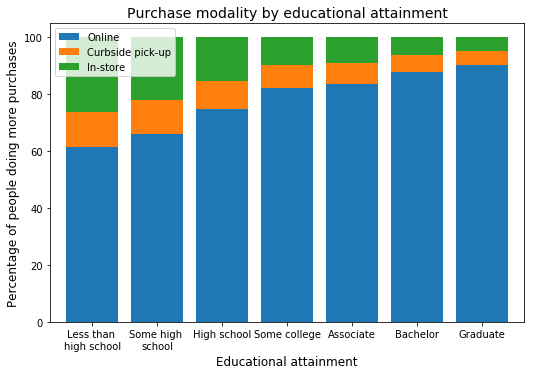

In [64]:
purchase_reg = df_purchase_valid.groupby(['EEDUC', 'PURCHASE']).count()
purchase_reg = purchase_reg/purchase_reg.groupby(level=[0]).sum()*100

test = purchase_reg .SCRAM.unstack('PURCHASE').fillna(0)
legend = ['Online', 'Curbside pick-up', 'In-store']
labels = educ

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Purchase modality by educational attainment', size=14)
_ = plt.xlabel('Educational attainment', size=12)
_ = plt.ylabel('Percentage of people doing more purchases', size=12)

In [65]:
get_rctable('PURCHASE', 'GENERATION', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
GENERATION,,,
Baby Boomer,83.76,5.81,10.43
Generation Jones,84.55,5.95,9.5
Generation X,86.85,6.19,6.96
Generation Z,81.97,10.33,7.7
Millennials,87.35,7.63,5.02
Silent Generation,78.89,7.73,13.38


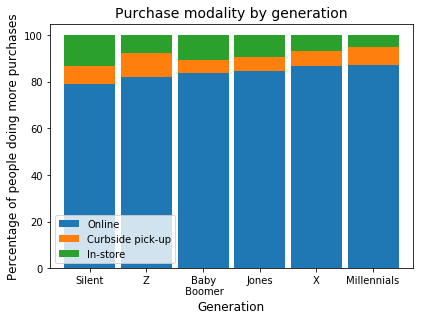

In [66]:
purchase_gen = df_purchase_valid.groupby(['GENERATION', 'PURCHASE']).count()
purchase_gen = purchase_gen/purchase_gen.groupby(level=[0]).sum()*100

test = purchase_gen.SCRAM.unstack('PURCHASE').fillna(0).sort_values('CHNGHOW1')
legend = ['Online', 'Curbside pick-up', 'In-store']
labels = ['Silent', 'Z', 'Baby\n Boomer', 'Jones', 'X', 'Millennials']

fig, ax = plt.subplots(figsize=(6.5, 4.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.9)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Purchase modality by generation', size=14)
_ = plt.xlabel('Generation', size=12)
_ = plt.ylabel('Percentage of people doing more purchases', size=12)

In [67]:
get_rctable('PURCHASE', 'EST_MSA', df_purchase_valid)

PURCHASE,CHNGHOW1,CHNGHOW2,CHNGHOW3
EST_MSA,,,
12060.0,86.05,5.64,8.3
14460.0,89.73,3.82,6.44
16980.0,86.51,6.14,7.35
19100.0,84.04,7.71,8.25
19820.0,83.81,6.88,9.31
26420.0,82.23,8.6,9.17
31080.0,88.5,4.78,6.72
33100.0,85.3,5.1,9.61
35620.0,87.36,4.05,8.59


In [68]:
pd.DataFrame(list(msa.items()), columns=['EST_MSA', 'MSA']) 

,EST_MSA,MSA
0,35620,New York-Newark-Jersey City
1,31080,Los Angeles-Long Beach-Anaheim
2,16980,Chicago-Naperville-Elgin
3,19100,Dallas-Fort Worth-Arlington
4,26420,Houston-The Woodlands-Sugar Land
5,47900,Washington-Arlington-Alexandria
6,33100,Miami-Fort Lauderdale-Pompano Beach
7,37980,Philadelphia-Camden-Wilmington
8,12060,Atlanta-Sandy Springs-Alpharetta
9,38060,Phoenix-Mesa-Chandler


In [69]:
df_msa = pd.DataFrame(list(msa.items()), columns=['EST_MSA', 'MSA']) 
df_msa['EST_MSA'] = df_msa['EST_MSA'].apply(lambda x: float(x))
df_msa['MSA'] = df_msa['MSA'].apply(lambda x: str(x))

In [70]:
temp = get_rct('PURCHASE', 'EST_MSA', df_purchase_valid)
temp = temp.reset_index().reset_index()
temp = temp.merge(df_msa, right_on='EST_MSA', left_on='EST_MSA')

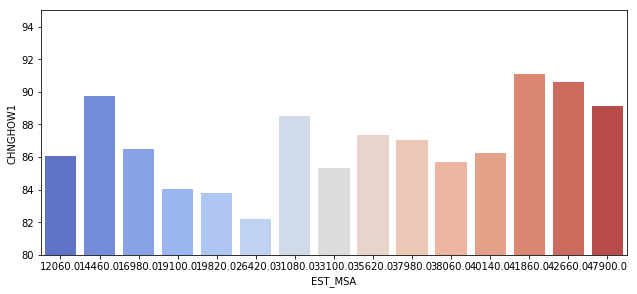

In [71]:
fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = sns.barplot(x='EST_MSA', y='CHNGHOW1', data=temp, palette='coolwarm')
_ = plt.ylim(80, 95) 

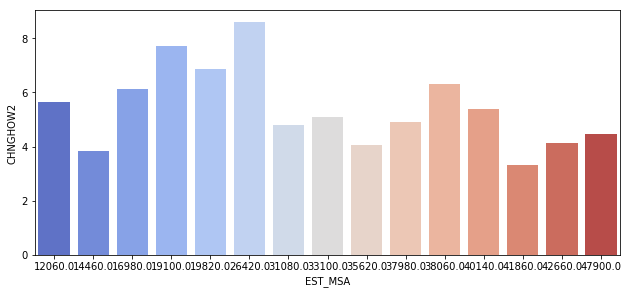

In [72]:
fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = sns.barplot(x='EST_MSA', y='CHNGHOW2', data=temp, palette='coolwarm')

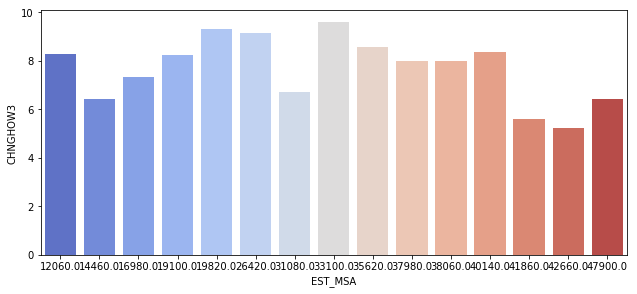

In [73]:
fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = sns.barplot(x='EST_MSA', y='CHNGHOW3', data=temp, palette='coolwarm')

In [74]:
temp1 = pd.melt(temp, id_vars='EST_MSA', value_vars=['CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3'])

In [75]:
temp1.head()

,EST_MSA,variable,value
0,12060.0,CHNGHOW1,86.05
1,14460.0,CHNGHOW1,89.73
2,16980.0,CHNGHOW1,86.51
3,19100.0,CHNGHOW1,84.04
4,19820.0,CHNGHOW1,83.81


## 2. PAYMENT

`CHNGHOW4` is refering to increase the use of credit cards or smartphone apps for purchases, `CHNGHOW5` is refering to increase the use of cash instead using credit cards or smartphones apps to purchases. 

In [76]:
x = df.loc[:, ['CHNGHOW4', 'CHNGHOW5']].idxmax(axis=1)
df['PAYMENT'] = x

df_payment = df.loc[:, list(demographics) + ['PAYMENT','GENERATION','DATE_START']]
df_payment_valid = df_payment.dropna(subset=['PAYMENT'])
df_payment_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275515 entries, 3 to 72482
Data columns (total 17 columns):
SCRAM            275515 non-null object
WEEK             275515 non-null float64
EST_ST           275515 non-null float64
EST_MSA          93599 non-null float64
REGION           275515 non-null float64
TBIRTH_YEAR      275515 non-null float64
EGENDER          275515 non-null float64
RHISPANIC        275515 non-null float64
RRACE            275515 non-null float64
EEDUC            275515 non-null float64
MS               274287 non-null float64
THHLD_NUMPER     275515 non-null float64
THHLD_NUMKID     275515 non-null float64
THHLD_NUMADLT    275515 non-null float64
PAYMENT          275515 non-null object
GENERATION       275515 non-null object
DATE_START       275515 non-null object
dtypes: float64(13), object(4)
memory usage: 37.8+ MB


In [77]:
get_rctable('PAYMENT', 'DATE_START', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
DATE_START,,
2020-08-19,92.28,7.72
2020-09-02,92.25,7.75
2020-09-16,92.3,7.7
2020-09-30,92.76,7.24
2020-10-14,92.72,7.28
2020-10-28,92.67,7.33
2020-11-11,93.4,6.6
2020-11-25,93.85,6.15


In [78]:
temp = get_rct('PAYMENT', 'DATE_START', df_payment_valid).pct_change().cumsum().reset_index()
temp 

PAYMENT,DATE_START,CHNGHOW4,CHNGHOW5
0,2020-08-19,NaN,NaN
1,2020-09-02,-0.000325,0.003886
2,2020-09-16,0.000217,-0.002566
3,2020-09-30,0.005201,-0.062306
4,2020-10-14,0.004769,-0.056781
5,2020-10-28,0.004230,-0.049913
6,2020-11-11,0.012108,-0.149504
7,2020-11-25,0.016926,-0.217685


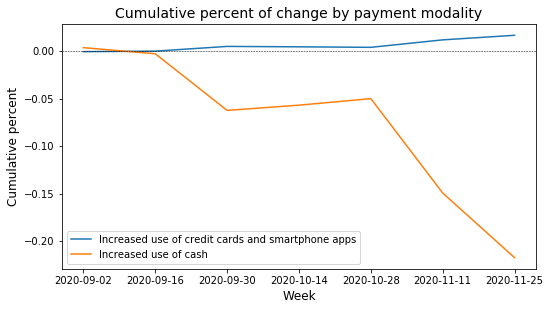

In [79]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y='CHNGHOW4', x='DATE_START', data=temp, label='Increased use of credit cards and smartphone apps')
_ = sns.lineplot(y='CHNGHOW5', x='DATE_START', data=temp, label='Increased use of cash')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change by payment modality', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [80]:
temp1 = pd.crosstab(df_payment_valid.DATE_START, [df_payment_valid.PAYMENT, df_payment_valid.REGION])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

In [81]:
temp2.columns[1]

('CHNGHOW4', 1.0)

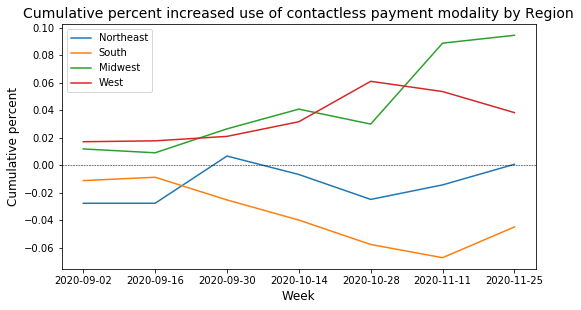

In [82]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[1], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[2], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[3], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[4], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent increased use of contactless payment modality by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

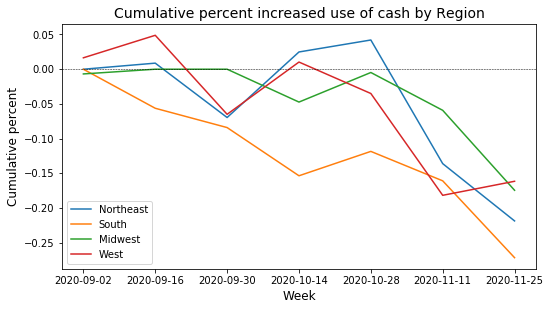

In [83]:
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[5], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[6], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent increased use of cash by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [84]:
get_rctable('PAYMENT', 'REGION', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
REGION,,
1.0,93.37,6.63
2.0,91.99,8.01
3.0,92.73,7.27
4.0,93.04,6.96


In [85]:
get_rctable('PAYMENT', 'RRACE', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
RRACE,,
1.0,93.26,6.74
2.0,87.56,12.44
3.0,95.36,4.64
4.0,89.93,10.07


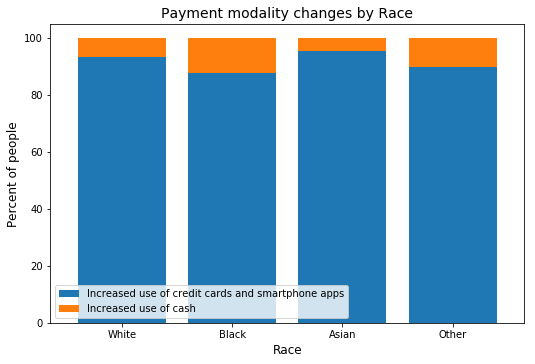

In [86]:
payment_educ = df_payment_valid.groupby(['RRACE', 'PAYMENT']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('PAYMENT').fillna(0)
legend = ['Increased use of credit cards and smartphone apps', 'Increased use of cash']
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Payment modality changes by Race', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [87]:
get_rctable('PAYMENT', 'EEDUC', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
EEDUC,,
1.0,75.38,24.62
2.0,81.06,18.94
3.0,86.58,13.42
4.0,90.86,9.14
5.0,90.61,9.39
6.0,94.64,5.36
7.0,95.75,4.25


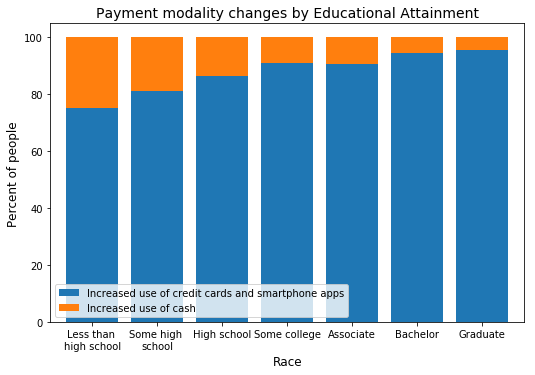

In [88]:
payment_educ = df_payment_valid.groupby(['EEDUC', 'PAYMENT']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('PAYMENT').fillna(0)
legend = ['Increased use of credit cards and smartphone apps', 'Increased use of cash']
labels = educ

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Payment modality changes by Educational Attainment', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [89]:
get_rctable('PAYMENT', 'GENERATION', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
GENERATION,,
Baby Boomer,90.6,9.4
Generation Jones,89.45,10.55
Generation X,93.14,6.86
Generation Z,95.5,4.5
Millennials,95.71,4.29
Silent Generation,90.6,9.4


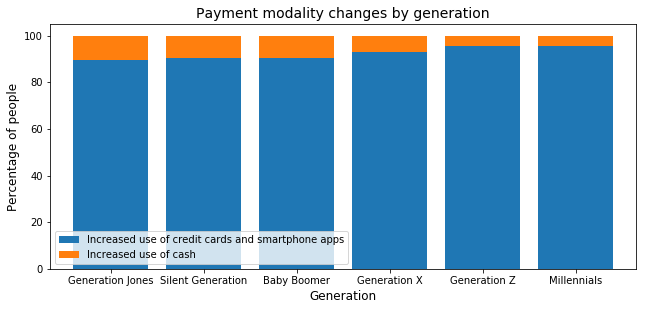

In [90]:
purchase_gen = df_payment_valid.groupby(['GENERATION', 'PAYMENT']).count()
purchase_gen = purchase_gen/purchase_gen.groupby(level=[0]).sum()*100

test = purchase_gen.SCRAM.unstack('PAYMENT').fillna(0).sort_values('CHNGHOW4')
legend = ['Increased use of credit cards and smartphone apps', 'Increased use of cash']
labels = list(test.index)

fig, ax = plt.subplots(figsize=(10.5, 4.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8)
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend)
_ = plt.title('Payment modality changes by generation', size=14)
_ = plt.xlabel('Generation', size=12)
_ = plt.ylabel('Percentage of people', size=12)

In [91]:
get_rctable('PAYMENT', 'EST_MSA', df_payment_valid)

PAYMENT,CHNGHOW4,CHNGHOW5
EST_MSA,,
12060.0,92.73,7.27
14460.0,94.55,5.45
16980.0,94.34,5.66
19100.0,92.32,7.68
19820.0,92,8
26420.0,92.64,7.36
31080.0,93.8,6.2
33100.0,92.35,7.65
35620.0,93.29,6.71


## Restaurants

In [92]:
x = df.loc[:, ['CHNGHOW6', 'CHNGHOW7']].idxmax(axis=1)
df['RESTAURANTS'] = x

df_restaurant = df.loc[:, list(demographics) + ['RESTAURANTS','GENERATION','DATE_START']]
df_restaurant_valid = df_restaurant.dropna(subset=['RESTAURANTS'])
df_restaurant_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446694 entries, 1 to 72482
Data columns (total 17 columns):
SCRAM            446694 non-null object
WEEK             446694 non-null float64
EST_ST           446694 non-null float64
EST_MSA          147180 non-null float64
REGION           446694 non-null float64
TBIRTH_YEAR      446694 non-null float64
EGENDER          446694 non-null float64
RHISPANIC        446694 non-null float64
RRACE            446694 non-null float64
EEDUC            446694 non-null float64
MS               444576 non-null float64
THHLD_NUMPER     446694 non-null float64
THHLD_NUMKID     446694 non-null float64
THHLD_NUMADLT    446694 non-null float64
RESTAURANTS      446694 non-null object
GENERATION       446694 non-null object
DATE_START       446694 non-null object
dtypes: float64(13), object(4)
memory usage: 61.3+ MB


In [93]:
get_rctable('RESTAURANTS', 'DATE_START', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
DATE_START,,
2020-08-19,86.48,13.52
2020-09-02,85.56,14.44
2020-09-16,85.42,14.58
2020-09-30,85.5,14.5
2020-10-14,86.35,13.65
2020-10-28,87.67,12.33
2020-11-11,91.27,8.73
2020-11-25,93.66,6.34


In [94]:
temp = get_rct('RESTAURANTS', 'DATE_START', df_restaurant_valid).pct_change().cumsum().reset_index()
temp 

RESTAURANTS,DATE_START,CHNGHOW6,CHNGHOW7
0,2020-08-19,NaN,NaN
1,2020-09-02,-0.010638,0.068047
2,2020-09-16,-0.012275,0.077743
3,2020-09-30,-0.011338,0.072256
4,2020-10-14,-0.001397,0.013635
5,2020-10-28,0.013890,-0.083068
6,2020-11-11,0.054953,-0.375039
7,2020-11-25,0.081139,-0.648808


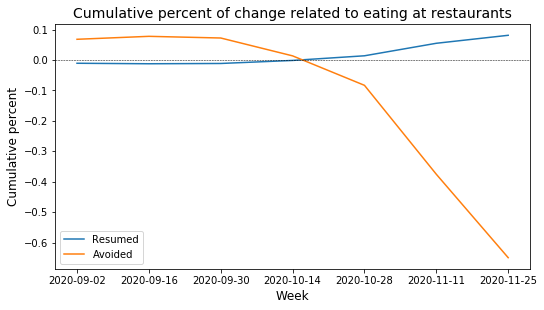

In [95]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y='CHNGHOW6', x='DATE_START', data=temp, label='Resumed')
_ = sns.lineplot(y='CHNGHOW7', x='DATE_START', data=temp, label='Avoided')
_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent of change related to eating at restaurants', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [96]:
temp1 = pd.crosstab(df_restaurant_valid.DATE_START, [df_restaurant_valid.RESTAURANTS, df_restaurant_valid.REGION])
temp2 = round(temp1.div(temp1.sum(axis = 1),axis = 0)*100, 2).pct_change().cumsum()
temp2 = temp2.reset_index()

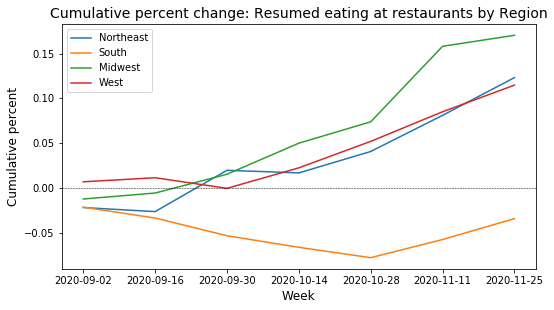

In [97]:
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[1], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[2], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[3], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[4], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent change: Resumed eating at restaurants by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

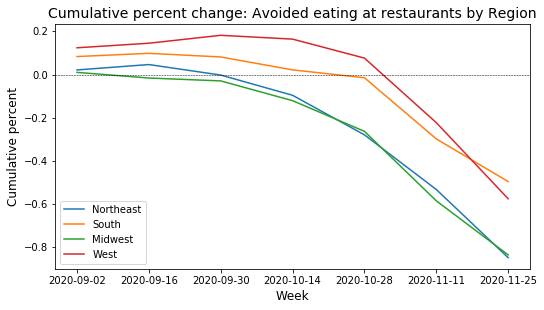

In [98]:
#Cumulative percentage of change across the weeks by type of purchase modality
fig, ax = plt.subplots(figsize=(8.5, 4.5))
_ = sns.lineplot(y=temp2.columns[5], x='DATE_START', data=temp2, label='Northeast')
_ = sns.lineplot(y=temp2.columns[6], x='DATE_START', data=temp2, label='South')
_ = sns.lineplot(y=temp2.columns[7], x='DATE_START', data=temp2, label='Midwest')
_ = sns.lineplot(y=temp2.columns[8], x='DATE_START', data=temp2, label='West')

_ = plt.axhline(y=0, color='k', linestyle='--', lw=0.5)
_ = plt.title('Cumulative percent change: Avoided eating at restaurants by Region', size=14)
_ = plt.xlabel('Week', size=12)
_ = plt.ylabel('Cumulative percent', size=12)

In [99]:
get_rctable('RESTAURANTS', 'REGION', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
REGION,,
1.0,87.2,12.8
2.0,86.49,13.51
3.0,87.23,12.77
4.0,88.42,11.58


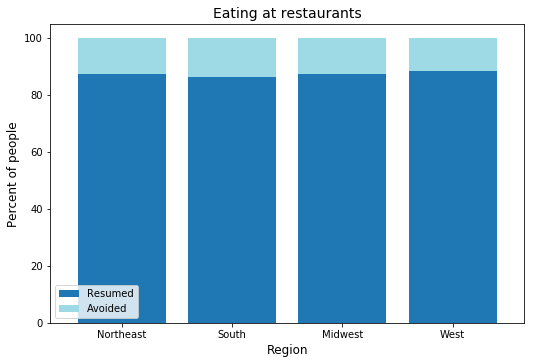

In [100]:
payment_educ = df_restaurant_valid.groupby(['REGION', 'RESTAURANTS']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Resumed', 'Avoided']
labels = region

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Region', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [101]:
get_rctable('RESTAURANTS', 'RRACE', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
RRACE,,
1.0,86.36,13.64
2.0,93.07,6.93
3.0,92.3,7.7
4.0,90.04,9.96


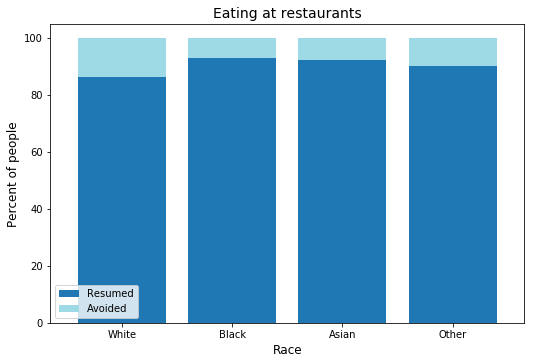

In [102]:
payment_educ = df_restaurant_valid.groupby(['RRACE', 'RESTAURANTS']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Resumed', 'Avoided']
labels = race

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Race', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [103]:
get_rctable('RESTAURANTS', 'EEDUC', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
EEDUC,,
1.0,93.4,6.6
2.0,93.34,6.66
3.0,88.73,11.27
4.0,87,13
5.0,86.43,13.57
6.0,86.02,13.98
7.0,88.77,11.23


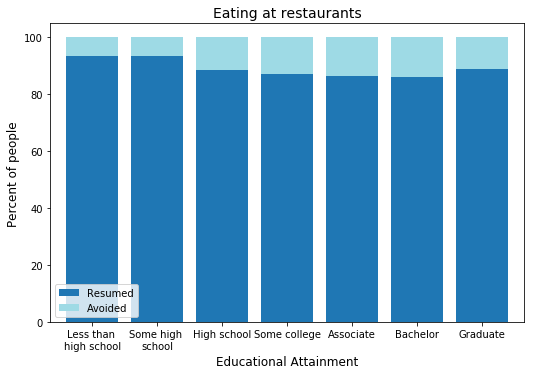

In [104]:
payment_educ = df_restaurant_valid.groupby(['EEDUC', 'RESTAURANTS']).count()
payment_educ = payment_educ/payment_educ.groupby(level=[0]).sum()*100

test = payment_educ.SCRAM.unstack('RESTAURANTS').fillna(0)
legend = ['Resumed', 'Avoided']
labels = educ

fig, ax = plt.subplots(figsize=(8.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Educational Attainment', size=12)
_ = plt.ylabel('Percent of people', size=12)

In [105]:
get_rctable('RESTAURANTS', 'GENERATION', df_restaurant_valid)

RESTAURANTS,CHNGHOW6,CHNGHOW7
GENERATION,,
Baby Boomer,88.27,11.73
Generation Jones,87.71,12.29
Generation X,86.92,13.08
Generation Z,83.61,16.39
Millennials,87.47,12.53
Silent Generation,87.8,12.2


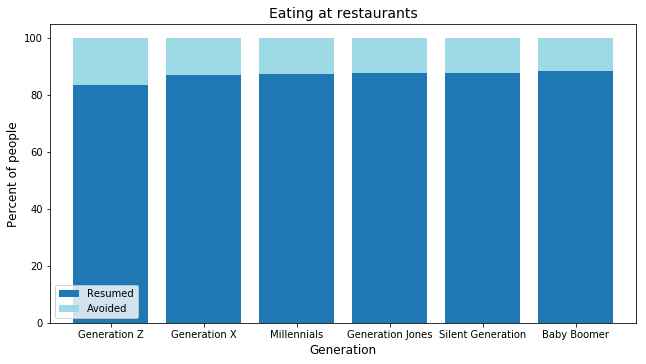

In [106]:
restaurant_gen = df_restaurant_valid.groupby(['GENERATION', 'RESTAURANTS']).count()
restaurant_gen = restaurant_gen/restaurant_gen.groupby(level=[0]).sum()*100

test = restaurant_gen.SCRAM.unstack('RESTAURANTS').fillna(0).sort_values('CHNGHOW6')
legend = ['Resumed', 'Avoided']
labels = list(test.index)

fig, ax = plt.subplots(figsize=(10.5, 5.5))
_ = test.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap='tab20')
_ = plt.xticks(np.arange(len(labels)), labels, rotation=0)
_ = plt.legend(legend, loc='lower left')
_ = plt.title('Eating at restaurants', size=14)
_ = plt.xlabel('Generation', size=12)
_ = plt.ylabel('Percent of people', size=12)